<a href="https://colab.research.google.com/github/krishna324-art/openCV/blob/main/SHAP_for_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load resnet50 trained on imagenet50 -> normalize images-> load shap for explainer for image-> analayze the features/pixels of image contributing to classification


In [2]:
pip install shap tensorflow

In [3]:
import json
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import shap
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#load pre-trained model and data
model=ResNet50(weights="imagenet")
X,y=shap.datasets.imagenet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [32]:
print(y)

[6.3810e+03 1.6130e+03 7.2230e+03 7.2900e+03 7.4670e+03 8.1100e+02
 1.6028e+04 2.5680e+03 2.6251e+04 3.1050e+03 9.9540e+03 6.1170e+03
 2.2400e+03 3.9048e+04 9.3750e+03 6.2520e+03 7.8020e+03 1.4311e+04
 7.2780e+03 1.6148e+04 2.9190e+03 1.1105e+04 6.7670e+03 4.8980e+03
 3.7030e+03 1.4533e+04 4.2080e+03 5.6720e+03 9.5190e+03 7.2850e+03
 7.4270e+03 1.5667e+04 1.9730e+03 1.5199e+04 9.1830e+03 3.1090e+03
 2.4100e+03 8.1700e+03 1.0266e+04 2.6630e+03 7.1150e+03 3.5520e+03
 3.6620e+03 4.3860e+03 2.2866e+04 6.0770e+03 2.2100e+04 3.5310e+03
 1.3000e+01 2.0020e+03]


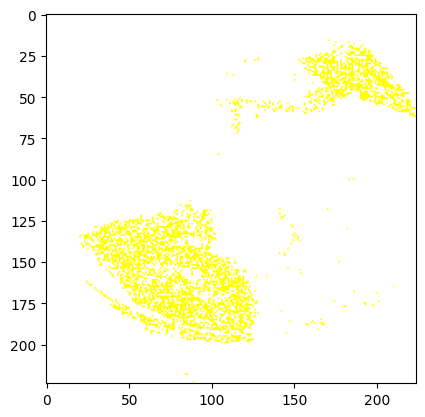

In [11]:
plt.imshow(X[20])

In [12]:
print(X[20])

[[[ 29.  18.  14.]
  [ 29.  18.  16.]
  [ 30.  19.  17.]
  ...
  [170. 153. 125.]
  [169. 153. 127.]
  [169. 154. 125.]]

 [[ 29.  18.  16.]
  [ 29.  18.  16.]
  [ 29.  18.  14.]
  ...
  [169. 152. 126.]
  [170. 153. 127.]
  [169. 152. 124.]]

 [[ 29.  17.  17.]
  [ 29.  18.  16.]
  [ 29.  18.  14.]
  ...
  [170. 153. 125.]
  [169. 152. 122.]
  [170. 154. 120.]]

 ...

 [[121. 105.  89.]
  [117.  99.  85.]
  [118.  99.  84.]
  ...
  [ 61.  61.  61.]
  [ 60.  60.  68.]
  [ 64.  69.  89.]]

 [[119. 102.  82.]
  [120. 103.  75.]
  [120. 105.  76.]
  ...
  [ 76.  76.  78.]
  [ 73.  77.  88.]
  [ 72.  77.  97.]]

 [[119. 102.  84.]
  [121. 104.  78.]
  [121. 106.  75.]
  ...
  [ 99. 100. 105.]
  [ 96.  95. 101.]
  [ 89.  92.  99.]]]


In [15]:
#scaling the image
#assume that  image contains data needs to be sacled to range[0,255]
X=np.clip(X,0,255).astype(np.uint8)


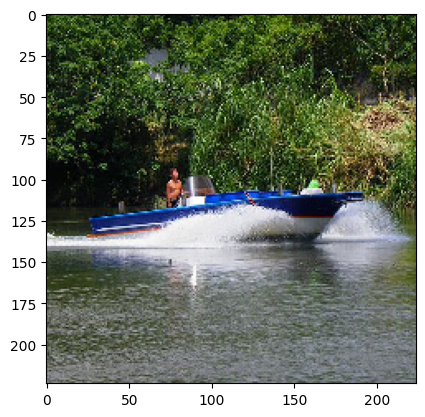

In [33]:
plt.imshow(X[2])

In [20]:
print(X.shape)

(50, 224, 224, 3)


In [21]:
#getting the 1000 class names
url="https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
  class_names=[v[1] for v in json.load(file).values()]

In [23]:
print("number of imagenet classes:",len(class_names))
print("class names:",class_names)

number of imagenet classes: 1000
class names: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python', 'Indian_cobra', 'green_mamba'

In [46]:
def f(x):
    # Preprocess the input x directly, not the global X
    return model.predict(preprocess_input(x))

#define a masker that is used to mask out partitions of the input image
masker=shap.maskers.Image("inpaint_telea",X[0].shape)
#create an explainer with model and image masker
explainer=shap.Explainer(f,masker,output_names=class_names)
#here we explain two images using 1oo evaluation of underlayingmodl to estimate the SHAP values
shap_values=explainer(X[1:3],max_evals=100,batch_size=50,outputs=shap.Explanation.argsort.flip[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


  0%|          | 0/98 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  0%|          | 0/98 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step


PartitionExplainer explainer: 3it [00:41, 20.95s/it]


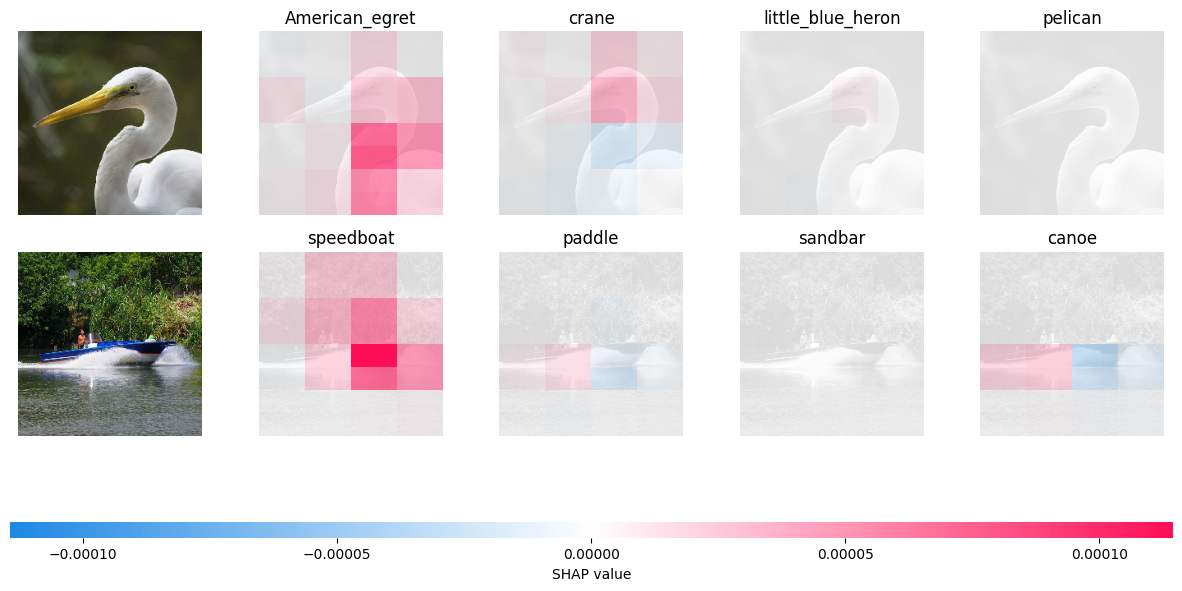

<Figure size 640x480 with 0 Axes>

In [50]:
# output with shap values
# this highlighted group of pixels making it look like what predictions

shap.image_plot(shap_values)

# Save the plot as a static image for GitHub compatibility
import matplotlib.pyplot as plt
plt.savefig('shap_image_plot_inpaint.png', bbox_inches='tight')

In [44]:
def f(x):
    # Preprocess the input x directly, not the global X
    return model.predict(preprocess_input(x))

#define a masker that is used to mask out partitions of the input image
masker=shap.maskers.Image("blur(128,128)",X[0].shape)
#create an explainer with model and image masker
explainer=shap.Explainer(f,masker,output_names=class_names)
#here we explain two images using 1oo evaluation of underlayingmodl to estimate the SHAP values
shap_values_fine=explainer(X[1:3],max_evals=500,batch_size=50,outputs=shap.Explanation.argsort.flip[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


  0%|          | 0/498 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  0%|          | 0/498 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step


PartitionExplainer explainer: 3it [03:06, 93.22s/it]


### SHAP Explanation with Inpaint Masker

![SHAP Inpaint Plot](shap_image_plot_inpaint.png)

### SHAP Explanation with Blur Masker

![SHAP Blur Plot](shap_image_plot_blur.png)

To ensure these plots are visible on GitHub, remember to upload both the `.ipynb` notebook file and the generated `shap_image_plot_inpaint.png` and `shap_image_plot_blur.png` image files to the same directory in your GitHub repository. This is the recommended way to display the visual results of your outputs on GitHub.

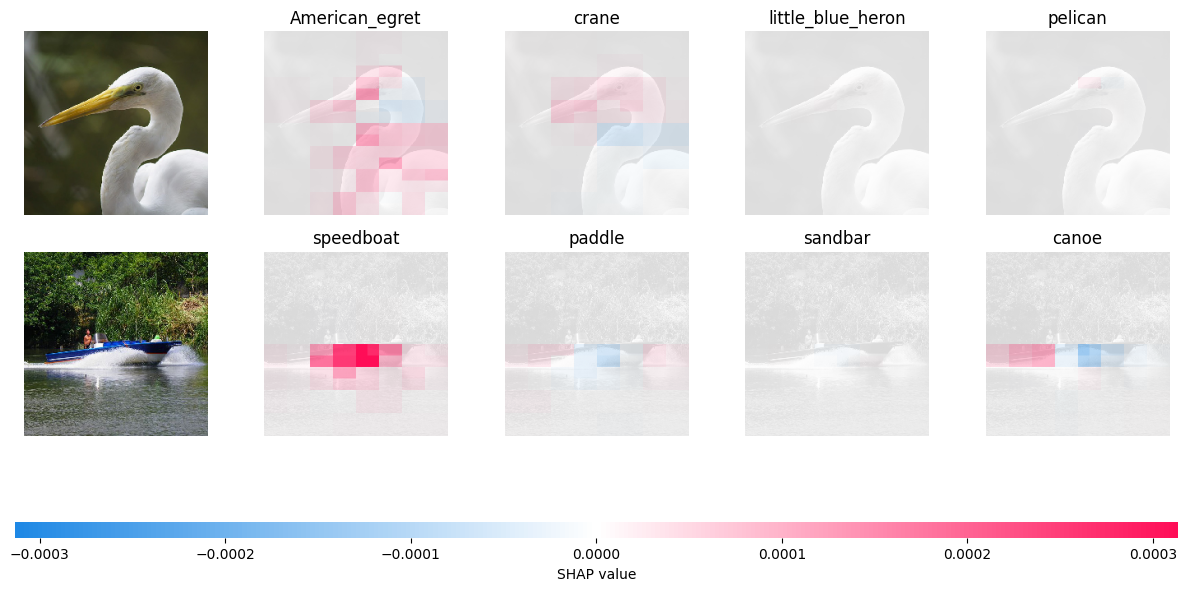

<Figure size 640x480 with 0 Axes>

In [51]:
shap.image_plot(shap_values_fine)

# Save the plot as a static image for GitHub compatibility
import matplotlib.pyplot as plt
plt.savefig('shap_image_plot_blur.png', bbox_inches='tight')